In [9]:
import numpy as np

velocity = np.load("./openfoam.npy")
print(velocity.shape)

(1177, 21, 128, 128, 2)


In [ ]:
# Select trajectory to visualize
trajectory_index = 0

# Extract horizontal and vertical velocity for the trajectory
u_velocity = velocity[trajectory_index, :, :, :, 0]  # All time steps for horizontal velocity
v_velocity = velocity[trajectory_index, :, :, :, 1]  # All time steps for vertical velocity

print("Shape of u_velocity:", u_velocity.shape)
print("Shape of v_velocity:", v_velocity.shape)

Shape of u_velocity: (21, 128, 128)
Shape of v_velocity: (21, 128, 128)


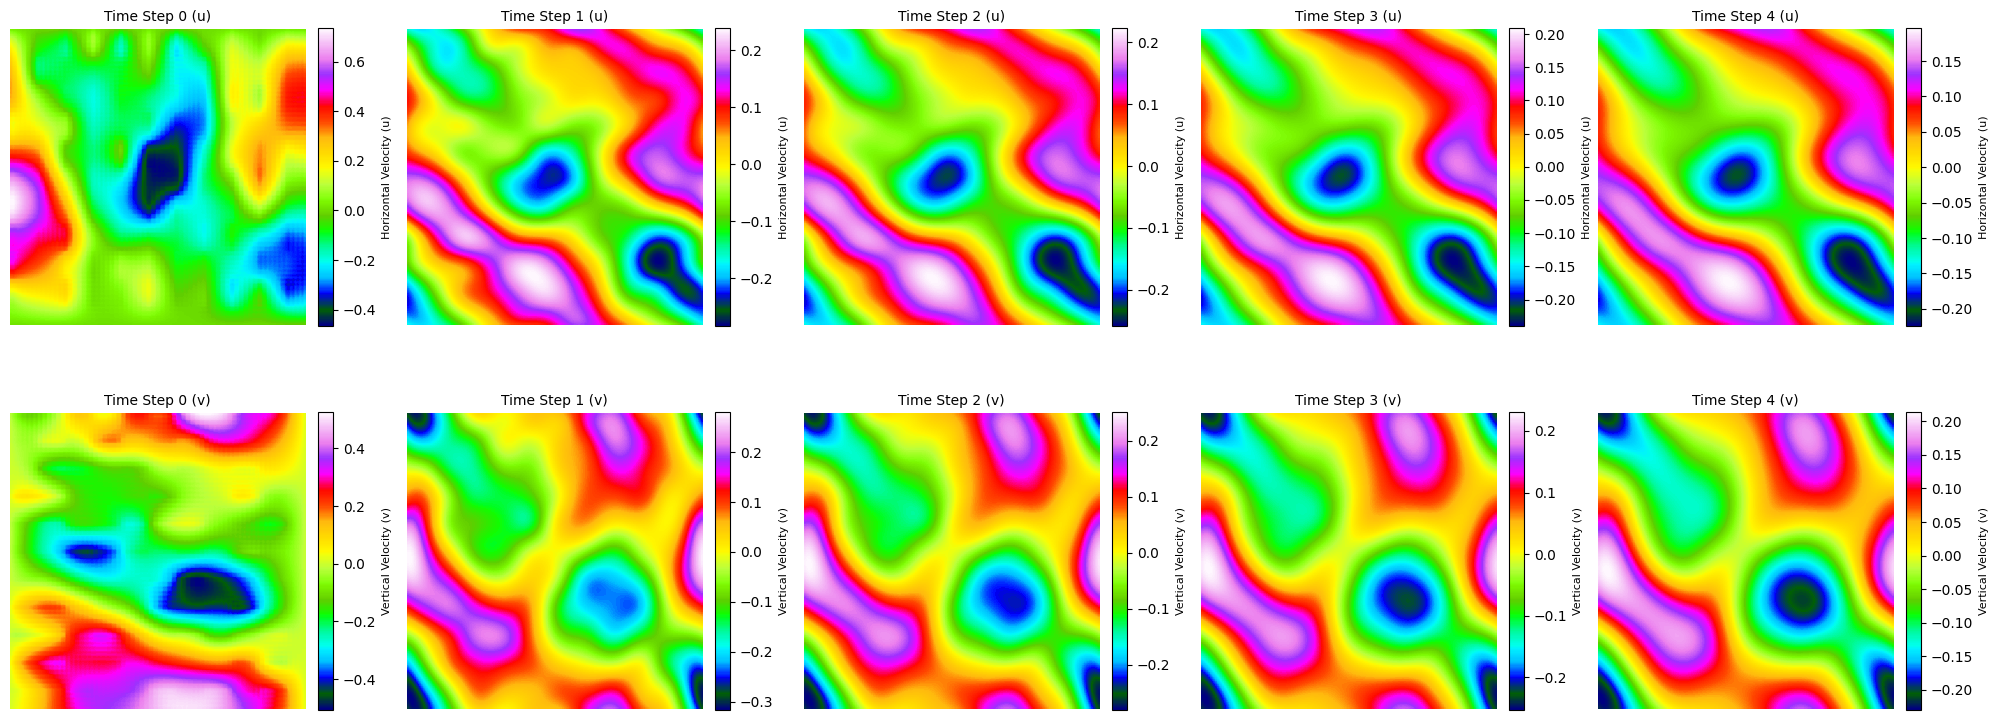

In [19]:
import matplotlib.pyplot as plt
# Time steps to plot
time_steps_to_plot = [0, 1, 2, 3, 4]

# Determine color limits for consistent scaling
u_min, u_max = np.min(u_velocity), np.max(u_velocity)
v_min, v_max = np.min(v_velocity), np.max(v_velocity)

# Create the plot
fig, axes = plt.subplots(2, len(time_steps_to_plot), figsize=(20, 8))  # 2 rows, specific columns

for i, time_step in enumerate(time_steps_to_plot):
    # Horizontal velocity (first row)
    im_u = axes[0, i].imshow(u_velocity[time_step], cmap='gist_ncar')
    axes[0, i].set_title(f'Time Step {time_step} (u)', fontsize=10)
    axes[0, i].axis('off')  # Hide axis ticks
    cbar_u = plt.colorbar(im_u, ax=axes[0, i], fraction=0.046, pad=0.04)
    cbar_u.set_label('Horizontal Velocity (u)', fontsize=8)

    # Vertical velocity (second row)
    im_v = axes[1, i].imshow(v_velocity[time_step], cmap='gist_ncar')
    axes[1, i].set_title(f'Time Step {time_step} (v)', fontsize=10)
    axes[1, i].axis('off')  # Hide axis ticks
    cbar_v = plt.colorbar(im_v, ax=axes[1, i], fraction=0.046, pad=0.04)
    cbar_v.set_label('Vertical Velocity (v)', fontsize=8)

plt.tight_layout()
plt.show()

Done 0


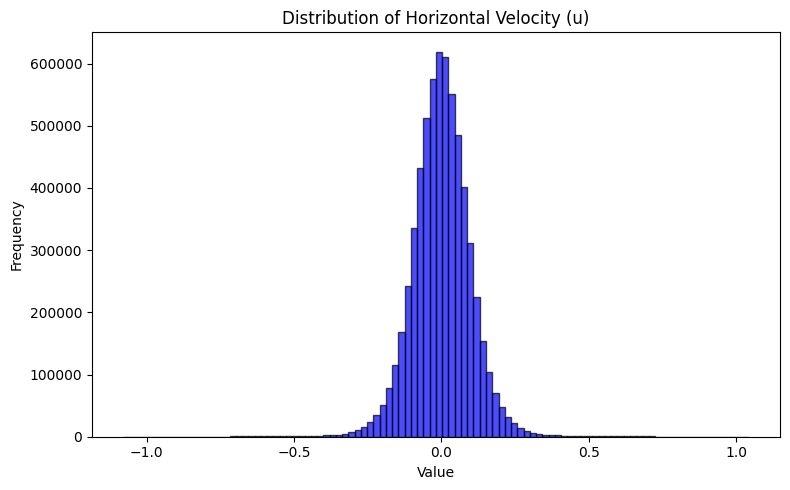

Done Horizontal Velocity (u)
Done 1


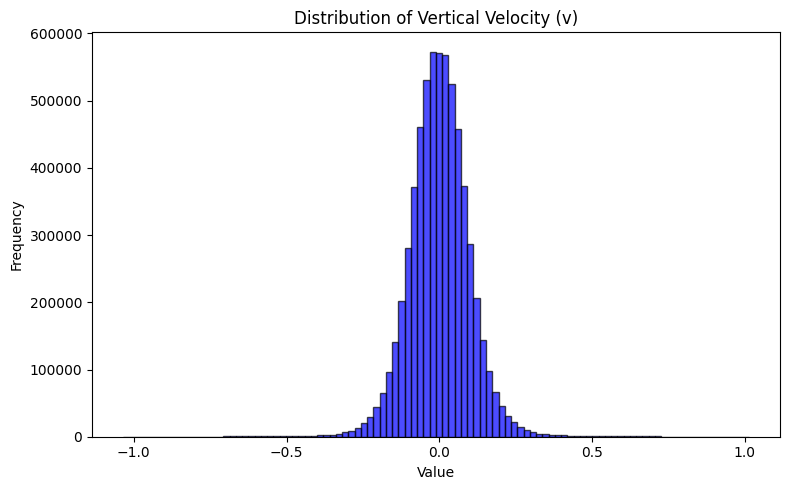

Done Vertical Velocity (v)
                             mean       std       min       max  \
Horizontal Velocity (u)  0.000030  0.102377 -1.080062  1.042735   
Vertical Velocity (v)    0.000037  0.101860 -1.034832  1.012996   

                         25th_percentile    median  75th_percentile  
Horizontal Velocity (u)        -0.059446 -0.000426         0.059240  
Vertical Velocity (v)          -0.059759 -0.000436         0.059592  


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Compute statistics for each channel
channel_names = ['Horizontal Velocity (u)', 'Vertical Velocity (v)']
stats = {}

for i, channel_name in enumerate(channel_names):
    channel_data = velocity[:, :, i, :, :].flatten()  # Flatten data for statistics
    channel_stats = {
        'mean': np.mean(channel_data),
        'std': np.std(channel_data),
        'min': np.min(channel_data),
        'max': np.max(channel_data),
        '25th_percentile': np.percentile(channel_data, 25),
        'median': np.median(channel_data),
        '75th_percentile': np.percentile(channel_data, 75)
    }
    stats[channel_name] = channel_stats
    print(f'Done {i}')

    # Plot histogram for the channel using matplotlib
    plt.figure(figsize=(8, 5))
    plt.hist(channel_data, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {channel_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print(f'Done {channel_name}')

# Display statistics
stats_df = pd.DataFrame(stats).T  # Transpose to view channels as rows
print(stats_df)
